In [0]:
# https://www.datacamp.com/courses/machine-learning-with-the-experts-school-budgets

In [0]:
# to import all 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, FunctionTransformer, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import HashingVectorizer

## 1. Exploring the raw data

#### Introducing the challenge

Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as pd) to load your data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

The training data is available as TrainingData.csv. Your first task is to load it into a DataFrame in the IPython Shell using pd.read_csv() along with the keyword argument index_col=0.

Use methods such as .info(), .head(), and .tail() to explore the budget data and the properties of the features and labels.

In [0]:
df = pd.read_csv('/content/ML with experts.csv', header=None, index_col=0)
df.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,,,,,
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,NaN,Operation and Maintenance of Plant Services,NaN,NaN,NaN,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8290.00,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,NaN,PUPIL TRANSPORTATION,NaN,NaN,NaN,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.00,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,NaN,NaN,TCHER 5TH GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,49800.00,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,NaN,NaN,NaN,NaN,NaN,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02,"""Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,NaN,Community Services,NaN,NaN,NaN,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2300.00,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


In [0]:
df.shape # (1560, 25)

(1560, 25)

In [0]:
df.columns = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status',
       'Object_Description', 'Text_2', 'SubFund_Description',
       'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description',
       'Location_Description', 'FTE', 'Function_Description',
       'Facility_or_Department', 'Position_Extra', 'Total',
       'Program_Description', 'Fund_Description', 'Text_1']

In [0]:
df.head(5)

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,,,,,,,,,,,,,,,,,,,,,,,,,
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,NaN,Operation and Maintenance of Plant Services,NaN,NaN,NaN,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8290.00,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,NaN,PUPIL TRANSPORTATION,NaN,NaN,NaN,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.00,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,NaN,NaN,TCHER 5TH GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,49800.00,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,NaN,NaN,NaN,NaN,NaN,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02,"""Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,NaN,Community Services,NaN,NaN,NaN,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2300.00,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


#### Exploring the data

Print summary statistics of the numeric columns in the DataFrame df using the .describe() method.

In [0]:
# Print the summary statistics
print(df.describe())

              FTE         Total
count  449.000000  1.542000e+03
mean     0.493532  1.447254e+04
std      0.452844  7.915691e+04
min     -0.002369 -1.040000e+06
25%      0.004310  1.110000e+02
50%      0.440000  7.060000e+02
75%      1.000000  5.345000e+03
max      1.047222  1.370000e+06


In [0]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

(array([173.,  30.,  11.,   7.,  21.,   5.,   8.,   7.,  12., 175.]),
 array([-0.002369 ,  0.1025901,  0.2075492,  0.3125083,  0.4174674,
         0.5224265,  0.6273856,  0.7323447,  0.8373038,  0.9422629,
         1.047222 ]),
 <a list of 10 Patch objects>)

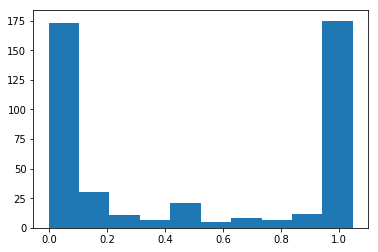

In [0]:
# Create the histogram
plt.hist(df['FTE'].dropna())

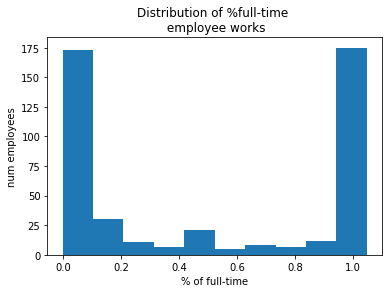

In [0]:
# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

#### Looking at the datatypes

The data has been loaded into the workspace as df. Your job is to look at the DataFrame attribute .dtypes in the IPython Shell, and call its .value_counts() method in order to answer the question below.

Make sure to call df.dtypes.value_counts(), and not df.value_counts()! Check out the difference in the Shell. df.value_counts() will return an error, because it is a Series method, not a DataFrame method.

In [0]:
df.dtypes

Function                   object
Use                        object
Sharing                    object
Reporting                  object
Student_Type               object
Position_Type              object
Object_Type                object
Pre_K                      object
Operating_Status           object
Object_Description         object
Text_2                     object
SubFund_Description        object
Job_Title_Description      object
Text_3                     object
Text_4                     object
Sub_Object_Description     object
Location_Description       object
FTE                       float64
Function_Description       object
Facility_or_Department     object
Position_Extra             object
Total                     float64
Program_Description        object
Fund_Description           object
Text_1                     object
dtype: object

In [0]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

In [0]:
df.value_counts()

AttributeError: ignored

**Encode the labels as categorical variables**

There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take. The 9 labels have been loaded into a list called LABELS. In the Shell, check out the type for these labels using df[LABELS].dtypes.

You will notice that every label is encoded as an object datatype. Because category datatypes are much more efficient your task is to convert the labels to category types using the .astype() method.

Note: .astype() only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the .apply() method and provide a lambda function called categorize_label that applies .astype() to each column, x.

In [0]:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']
LABELS

['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

Define the lambda function categorize_label to convert column x into x.astype('category').

In [0]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

In [0]:
# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

In [0]:
# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


**Counting unique labels**



In [0]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

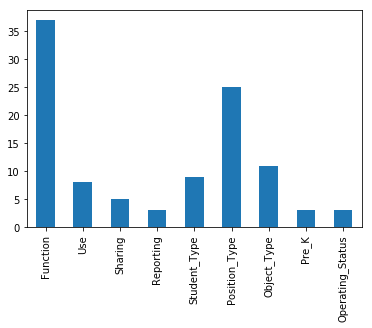

In [0]:
# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

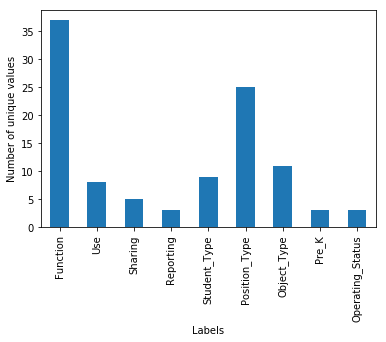

In [0]:
# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

#### Computing log loss with NumPy

To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function compute_log_loss().

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

Your job is to compute the log loss for each sample set provided using the compute_log_loss(predicted_values, actual_values). It takes the predicted values as the first argument and the actual values as the second argument.

In [0]:
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])

correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])

wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])

wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])

In [0]:
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between `predicted` and `actual` when these are 1D arrays.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    
    return -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))

In [0]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

Log loss, correct and confident: 0.05129329438755058


In [0]:
# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

Log loss, correct and not confident: 0.4307829160924542


In [0]:
# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

Log loss, wrong and not confident: 1.049822124498678


In [0]:
# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

Log loss, wrong and confident: 2.9957322735539904


In [0]:
# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels)) 


Log loss, actual labels: 9.99200722162646e-15


## 2. Creating a simple first model

#### It's time to build a model

The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least min_count examples of each label appear in each split: multilabel_train_test_split.

You'll start with a simple model that uses just the numeric columns of your DataFrame when calling multilabel_train_test_split. The data has been read into a DataFrame df and a list consisting of just the numeric columns is available as NUMERIC_COLUMNS.

In [0]:
def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)    
    train_set_idxs = np.setdiff1d(index, test_set_idxs)
    
    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask
    
    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [0]:
def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).all():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')
    
    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')
    
    if size <= 1:
        size = np.floor(y.shape[0] * size)
    
    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        # warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count
    
    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))
    
    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])
    
    sample_idxs = np.array([], dtype=choices.dtype)
    
    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])
        
    sample_idxs = np.unique(sample_idxs)
        
    # now that we have at least min_count of each, we can just random sample
    sample_count = size - sample_idxs.shape[0]
    
    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices, size=sample_count, replace=False)
        
    return np.concatenate([sample_idxs, remaining_sampled])



*   Create a new DataFrame named numeric_data_only by applying the .fillna(-1000) method to the numeric columns (available in the list NUMERIC_COLUMNS) of df.

*   Convert the labels (available in the list LABELS) to dummy variables. Save the result as label_dummies.

*   In the call to multilabel_train_test_split(), set the size of your test set to be 0.2. Use a seed of 123.


*   Fill in the .info() method calls for X_train, X_test, y_train, and y_test.



In [0]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [0]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

In [0]:
# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

In [0]:
label_dummies.head(5)

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,"Function_Finance, Budget, Purchasing & Distribution",Function_Food Services,Function_Governance,Function_Human Resources,Function_Instructional Materials & Supplies,Function_Insurance,Function_Legal,Function_Library & Media,Function_NO_LABEL,Function_Other Compensation,Function_Other Non-Compensation,Function_Parent & Community Relations,Function_Physical Health & Services,Function_Professional Development,Function_Recruitment,Function_Research & Accountability,Function_School Administration,Function_School Supervision,Function_Security & Safety,Function_Social & Emotional,Function_Special Population Program Management & Support,Function_Student Assignment,Function_Student Transportation,Function_Substitute Compensation,Function_Teacher Compensation,Function_Untracked Budget Set-Aside,Function_Utilities,Use_Business Services,Use_ISPD,Use_Instruction,...,Position_Type_Club Advisor/Coach,Position_Type_Coordinator/Manager,Position_Type_Custodian,Position_Type_Guidance Counselor,Position_Type_Instructional Coach,Position_Type_Librarian,Position_Type_NO_LABEL,Position_Type_Non-Position,Position_Type_Nurse,Position_Type_Nurse Aide,Position_Type_Occupational Therapist,Position_Type_Other,Position_Type_Physical Therapist,Position_Type_Principal,Position_Type_Psychologist,Position_Type_School Monitor/Security,Position_Type_Sec/Clerk/Other Admin,Position_Type_Social Worker,Position_Type_Speech Therapist,Position_Type_Substitute,Position_Type_TA,Position_Type_Teacher,Position_Type_Vice Principal,Object_Type_Base Salary/Compensation,Object_Type_Benefits,Object_Type_Contracted Services,Object_Type_Equipment & Equipment Lease,Object_Type_NO_LABEL,Object_Type_Other Compensation/Stipend,Object_Type_Other Non-Compensation,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [0]:
# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

In [0]:
# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 198 to 101861
Data columns (total 2 columns):
FTE      1040 non-null float64
Total    1040 non-null float64
dtypes: float64(2)
memory usage: 24.4 KB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 209 to 448628
Data columns (total 2 columns):
FTE      520 non-null float64
Total    520 non-null float64
dtypes: float64(2)
memory usage: 12.2 KB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 198 to 101861
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 113.8 KB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 209 to 448628
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 56.9 KB
None


**Training a model**

In this exercise, you will import the logistic regression and one versus rest classifiers in order to fit a multi-class logistic regression model to the NUMERIC_COLUMNS of your feature data.

Then you'll test and print the accuracy with the .score() method to see the results of training.

In [0]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [0]:
# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

In [0]:
# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

In [0]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [0]:
# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.0


#### Making predictions

In [0]:
# Load the holdout data: holdout
holdout = pd.read_csv('/content/ML with experts_holdout.csv', header=None, index_col=0)
holdout.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
237,Personal Services - Teachers,Instruction - Regular,NaN,NaN,NaN,NaN,NaN,0.0,NaN,TIME CARD CERTIFIEDAddl,Alternative Schools Instruction,175.0,NaN,NaN,General Purpose School,NaN
466,Extra Duty/Signing Bonus Pay,Basic Educational Services,NaN,NaN,NaN,General,School,NaN,Instruction,NaN,NaN,43400.0,NaN,NaN,General Fund,NaN
784,OTHER PERSONAL SERVICES,NaN,NaN,SUB TEACHER ALL,NaN,NaN,STAFF DEV AND INSTR MEDIA,0.0,INST STAFF TRAINING SVCS,NaN,NaN,75.1,NaN,NaN,GENERAL FUND,TEACHER TRAINING
1786,TERMINAL LEAVE VACATION,NaN,NaN,INSPECTOR & SERVICE TECHNICIAN,NaN,NaN,TRANSPORTATION,0.0,PUPIL TRANSPORTATION SERVICES,NaN,NaN,5270.0,NaN,NaN,GENERAL FUND,TERMINAL LEAVE
2643,Extra Duty/Signing Bonus Pay,Undistributed,NaN,NaN,NaN,Principal & Asst. Principal Support,Educator Quality,NaN,Curriculum & Instructional Staff Development,NaN,NaN,44800.0,NaN,NaN,General Fund,NaN


In [0]:
holdout.columns = ['Object_Description', 'Program_Description', 'SubFund_Description',
       'Job_Title_Description', 'Facility_or_Department',
       'Sub_Object_Description', 'Location_Description', 'FTE',
       'Function_Description', 'Position_Extra', 'Text_4', 'Total', 'Text_2',
       'Text_3', 'Fund_Description', 'Text_1']

In [0]:
holdout.shape # (2000, 16)

(2000, 16)

In [0]:
# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [0]:
predictions

array([[0.1079074 , 0.05155436, 0.01898326, ..., 0.12862383, 0.03139241,
        0.85219561],
       [0.02387206, 0.01298916, 0.00898569, ..., 0.07905002, 0.01152483,
        0.9077235 ],
       [0.10793318, 0.05155978, 0.01898575, ..., 0.12865741, 0.0313865 ,
        0.85216843],
       ...,
       [0.09890108, 0.04965793, 0.01809724, ..., 0.11678721, 0.03368076,
        0.86188215],
       [0.0267376 , 0.01362103, 0.00951925, ..., 0.0890605 , 0.01060185,
        0.89956715],
       [0.10051272, 0.05000983, 0.01825765, ..., 0.11887591, 0.03325923,
        0.8601507 ]])

**Writing out your results to a csv for submission**

To do this, you'll use your predictions values to create a new DataFrame, prediction_df.

Interpreting LogLoss & Beating the Benchmark:

When interpreting your log loss score, keep in mind that the score will change based on the number of samples tested. To get a sense of how this very basic model performs, compare your score to the DrivenData benchmark model performance: 2.0455, which merely submitted uniform probabilities for each class.

Remember, the lower the log loss the better. Is your model's log loss lower than 2.0455?

In [0]:
# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)

In [0]:
prediction_df.head(5)

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,"Function_Finance, Budget, Purchasing & Distribution",Function_Food Services,Function_Governance,Function_Human Resources,Function_Instructional Materials & Supplies,Function_Insurance,Function_Legal,Function_Library & Media,Function_NO_LABEL,Function_Other Compensation,Function_Other Non-Compensation,Function_Parent & Community Relations,Function_Physical Health & Services,Function_Professional Development,Function_Recruitment,Function_Research & Accountability,Function_School Administration,Function_School Supervision,Function_Security & Safety,Function_Social & Emotional,Function_Special Population Program Management & Support,Function_Student Assignment,Function_Student Transportation,Function_Substitute Compensation,Function_Teacher Compensation,Function_Untracked Budget Set-Aside,Function_Utilities,Use_Business Services,Use_ISPD,Use_Instruction,...,Position_Type_Club Advisor/Coach,Position_Type_Coordinator/Manager,Position_Type_Custodian,Position_Type_Guidance Counselor,Position_Type_Instructional Coach,Position_Type_Librarian,Position_Type_NO_LABEL,Position_Type_Non-Position,Position_Type_Nurse,Position_Type_Nurse Aide,Position_Type_Occupational Therapist,Position_Type_Other,Position_Type_Physical Therapist,Position_Type_Principal,Position_Type_Psychologist,Position_Type_School Monitor/Security,Position_Type_Sec/Clerk/Other Admin,Position_Type_Social Worker,Position_Type_Speech Therapist,Position_Type_Substitute,Position_Type_TA,Position_Type_Teacher,Position_Type_Vice Principal,Object_Type_Base Salary/Compensation,Object_Type_Benefits,Object_Type_Contracted Services,Object_Type_Equipment & Equipment Lease,Object_Type_NO_LABEL,Object_Type_Other Compensation/Stipend,Object_Type_Other Non-Compensation,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
237,0.107907,0.051554,0.018983,0.038208,0.036741,0.028427,0.063205,0.058761,0.112324,0.021181,0.050885,0.087913,0.026425,0.034792,0.051276,0.017433,0.016965,0.035343,0.135843,0.028254,0.015176,0.041555,0.146997,0.077265,0.017449,0.027281,0.067985,0.051352,0.054467,0.111446,0.047664,0.032903,0.096960,0.152216,0.168947,0.022062,0.024188,0.074154,0.144941,0.499849,...,0.032838,0.060645,0.067658,0.064788,0.042720,0.030919,0.096129,0.152234,0.042712,0.054413,0.041076,0.206819,0.031196,0.031841,0.048078,0.045943,0.082989,0.037354,0.053316,0.172741,0.122047,0.174405,0.036788,0.663861,0.159156,0.038976,0.022836,0.159420,0.198730,0.034779,0.039602,0.106906,0.144436,0.032347,0.500027,0.471728,0.092642,0.128624,0.031392,0.852196
466,0.023872,0.012989,0.008986,0.037126,0.013396,0.005028,0.035120,0.019156,0.040444,0.005116,0.012309,0.026691,0.007856,0.014619,0.045810,0.014461,0.012974,0.025440,0.100791,0.004767,0.015487,0.010874,0.051631,0.070215,0.007314,0.009088,0.043097,0.021051,0.019192,0.024302,0.022451,0.009960,0.025342,0.040764,0.059505,0.024250,0.016980,0.078830,0.111285,0.227804,...,0.010879,0.032080,0.018922,0.013078,0.025404,0.012459,0.288478,0.125121,0.009971,0.000000,0.007537,0.102249,0.012520,0.010373,0.012117,0.016342,0.017170,0.012498,0.015815,0.047598,0.037570,0.115299,0.011098,0.059018,0.274706,0.056565,0.028730,0.100195,0.190380,0.047887,0.024557,0.020679,0.109966,0.039890,0.776891,0.184392,0.036267,0.079050,0.011525,0.907723
784,0.107933,0.051560,0.018986,0.038214,0.036743,0.028432,0.063216,0.058775,0.112341,0.021184,0.050885,0.087933,0.026428,0.034

In [0]:
# Save prediction_df to csv
prediction_df.to_csv('/content/predictions.csv')

In [0]:
# Submit the predictions for scoring: score
score = score_submission(pred_path = 'predictions.csv')

In [0]:
# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

#### A very brief introduction to NLP




*   Tokenizing text:
> * Tokenization is the process of chopping up a character sequence into pieces called *tokens*.
> *  Often, tokens are separated by whitespace. But we can specify other delimiters as well. 


*   List item



In [0]:
one_grams = ['petro', 'vend', 'fuel', 'and', 'fluids']

The sum of the sizes of 1-gram, 2-grams and 3-grams generated by the string above:

5 + 4 + 3 = 12 

#### Representing text numerically

**Creating a bag-of-words in scikit-learn**

In this exercise, you'll study the effects of tokenizing in different ways by comparing the bag-of-words representations resulting from different token patterns.

You will focus on one feature only, the Position_Extra column, which describes any additional information not captured by the Position_Type label.

Your task is to turn the raw text in this column into a bag-of-words representation by creating tokens that contain only alphanumeric characters.



In [0]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'



*   Fill missing values in df.Position_Extra using .fillna('') to replace NaNs with empty strings. Specify the additional keyword argument inplace=True so that you don't have to assign the result back to df.




In [0]:
# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)



*   Instantiate the CountVectorizer as vec_alphanumeric by specifying the token_pattern to be TOKENS_ALPHANUMERIC.



In [0]:
# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern = TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra, df.Position_Type)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='[A-Za-z0-9]+(?=\\s+)',
        tokenizer=None, vocabulary=None)

In [0]:
# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

There are 110 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'assessment', 'assistant', 'asst', 'athletic', 'avg']


Treating only alpha-numeric characters as tokens gives you a smaller number of more meaningful tokens. You've got bag-of-words in the bag!

**Combining text columns for tokenization**

In order to use all of the text across columns, you'll need a method to turn a list of strings into a single string.

In this exercise, you'll complete the function definition combine_text_columns(). 

When completed, this function will convert all training text data in your DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

In [0]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis = 1)
    
    # Replace nans with blanks
    text_data.fillna("", inplace = True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [0]:
# Create the text vector
text_vector = combine_text_columns(df)

In [0]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

In [0]:
# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern = TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern = TOKENS_ALPHANUMERIC)

In [0]:
# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

There are 1389 tokens in the dataset


In [0]:
# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 1087 alpha-numeric tokens in the dataset


## 3. Improving your model

#### Pipelines, feature & text preprocessing

n this exercise, your job is to instantiate a pipeline that trains using the numeric column of the sample data.




In [0]:
# Import Pipeline
from sklearn.pipeline import Pipeline

In [0]:
# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [0]:
sample_df = pd.read_csv('/content/sample_df.csv', index_col=0)
print('df dimension:', sample_df.shape) # (1000, 4)
sample_df.head(5)

df dimension: (1000, 4)


,numeric,text,with_missing,label
0,-10.856306,NaN,4.433240,b
1,9.973454,foo,4.310229,b
2,2.829785,foo bar,2.469828,a
3,-15.062947,NaN,2.852981,b
4,-5.786003,foo bar,1.826475,a


In [0]:
# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

In [0]:
# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [0]:
# Fit the pipeline to the training data
pl.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])

In [0]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.62


**Preprocessing numeric features**

In this exercise you'll improve your pipeline a bit by using the Imputer() imputation transformer from scikit-learn to fill in missing values in your sample data.

By default, the imputer transformer replaces NaNs with the mean value of the column. That's a good enough imputation strategy for the sample data, so you won't need to pass anything extra to the imputer.

In [0]:
# Import the Imputer object
from sklearn.preprocessing import Imputer

In [0]:
# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

In [0]:
# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# Fit the pipeline to the training data
pl.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('imp', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])

In [0]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)


Accuracy on sample data - all numeric, incl nans:  0.636


#### Text features and feature unions

**Preprocessing text features**

Here, you'll perform a similar preprocessing pipeline step, only this time you'll use the text column from the sample data.

To preprocess the text, you'll turn to CountVectorizer() to generate a bag-of-words representation of the data, as in Chapter 2. Using the default arguments, add a (step, transform) tuple to the steps list in your pipeline.

Make sure you select only the text column for splitting your training and test sets.

In [0]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
sample_df.tail(5)

,numeric,text,with_missing,label
995,6.347631,foo,3.140256,b
996,10.699186,bar,NaN,a
997,-9.093270,NaN,4.132525,b
998,4.702637,foo bar,NaN,a
999,-11.114304,foo bar,1.963396,b


In [0]:
# remove nan
sample_df['text'] = sample_df['text'].fillna("")

In [0]:
sample_df.head(10)

,numeric,text,with_missing,label
0,-10.856306,,4.433240,b
1,9.973454,foo,4.310229,b
2,2.829785,foo bar,2.469828,a
3,-15.062947,,2.852981,b
4,-5.786003,foo bar,1.826475,a
5,16.514365,,2.764315,b
6,-24.266792,foo bar,3.024317,b
7,-4.289126,foo,2.596040,b
8,12.659363,,2.496415,a
9,-8.667404,bar,4.032080,a


In [0]:
# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

In [0]:
# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [0]:
# Fit to the training data
pl.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...te=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])

In [0]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.808


**Multiple types of processing: FunctionTransformer**

Any step in the pipeline must be an object that implements the fit and transform methods. The FunctionTransformer creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

You'll create functions that separate the text from the numeric variables and see how the .fit() and .transform() methods work.



*   Take entire DataFrame, return numeric columns
*   Take entire DataFrame, return text columns



In [0]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

In [0]:
# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

In [0]:
# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

In [0]:
# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
0           
1        foo
2    foo bar
3           
4    foo bar
Name: text, dtype: object

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.469828
3 -15.062947      2.852981
4  -5.786003      1.826475


**Multiple types of processing: FeatureUnion**

You're ready to perform separate steps on text and numeric data by nesting pipelines and using `FeatureUnion()`

These tools will allow you to streamline all preprocessing steps for your model, even when multiple datatypes are involved. 

... In the end, you'll still have only two high-level steps in your pipeline: preprocessing and model instantiation. The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. 

The results of those pipelines are joined using `FeatureUnion`.

In [0]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

In [0]:
# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

In [0]:
# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [0]:
# Fit pl to the training data
pl.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=None,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x7fdef7bb7730>, inv_kw_args=None,
          inverse_func=None, kw...te=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])

In [0]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


Accuracy on sample data - all data:  0.928


#### Choosing a classification model

**Using FunctionTransformer on the main dataset**

In this exercise you're going to use FunctionTransformer on the primary budget data, before instantiating a multiple-datatype pipeline in the next exercise.

In [0]:
df.shape # (1560, 25)

(1560, 25)

In [0]:
df.head(5)

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,,,,,,,,,,,,,,,,,,,,,,,,,
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,NaN,Operation and Maintenance of Plant Services,NaN,NaN,NaN,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,,-8290.00,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,NaN,PUPIL TRANSPORTATION,NaN,NaN,NaN,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,,618.00,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,NaN,NaN,TCHER 5TH GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,49800.00,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,NaN,NaN,NaN,NaN,NaN,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,,-1.02,"""Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,NaN,Community Services,NaN,NaN,NaN,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,,2300.00,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS




*   Complete the call to multilabel_train_test_split() by selecting df[NON_LABELS].

*   Compute get_text_data by using FunctionTransformer() and passing in combine_text_columns. Be sure to also specify validate=False.

*   se FunctionTransformer() to compute get_numeric_data. In the lambda function, select out the NUMERIC_COLUMNS of x. Like you did when computing get_text_data, also specify validate=False.




In [0]:
NUMERIC_COLUMNS

['FTE', 'Total']

In [0]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

In [0]:
df[LABELS].shape

(1560, 9)

In [0]:
# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

In [0]:
# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

In [0]:
# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

In [0]:
# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

In [0]:
# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

**Add a model to the pipeline**

You're about to take everything you've learned so far and implement it in a Pipeline.

The structure of the pipeline is exactly the same as earlier in this chapter:


*   the preprocessing step uses FeatureUnion to join the results of nested pipelines that each rely on FunctionTransformer to select multiple datatypes

*   the model step stores the model object




In [0]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# Fit to the training data
pl.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=None,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x7fdef7c42400>, inv_kw_args=None,
          inverse_func=None, kw...te=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])

In [0]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.19038461538461537


**Try a different class of model**

You'll swap out the logistic-regression model and replace it with a random forest classifier, which uses the statistics of an ensemble of decision trees to generate predictions.

In [0]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# Fit to the training data
pl.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=None,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x7fdef7c42400>, inv_kw_args=None,
          inverse_func=None, kw...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [0]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.29615384615384616


**Can you adjust the model or parameters to improve accuracy?**

Try changing the parameter n_estimators of RandomForestClassifier(), whose default value is 10, to 15.

In [0]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

In [0]:
# Fit to the training data
pl.fit(X_train, y_train)

In [0]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

# Accuracy on budget dataset:  0.3211538461538462 

## 4. Learning from the experts

#### Learning from the expert: processing

**Deciding what's a word**

In this exercise, you will use CountVectorizer on the training data X_train (preloaded into the workspace) to see the effect of tokenization on punctuation.

Remember, since CountVectorizer expects a vector, you'll need to use the preloaded function, combine_text_columns before fitting to the training data.

In [0]:
# load raw data
df = pd.read_csv('/content/ML with experts.csv', header=None, index_col=0)
df.columns = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status',
       'Object_Description', 'Text_2', 'SubFund_Description',
       'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description',
       'Location_Description', 'FTE', 'Function_Description',
       'Facility_or_Department', 'Position_Extra', 'Total',
       'Program_Description', 'Fund_Description', 'Text_1']

In [0]:
# subset dataset to match to datacamp training set

X = df[['Object_Description', 'Text_2', 'SubFund_Description',
       'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description',
       'Location_Description', 'FTE', 'Function_Description',
       'Facility_or_Department', 'Position_Extra', 'Total',
       'Program_Description', 'Fund_Description', 'Text_1']]

print("X dataset dimension:", X.shape)

X dataset dimension: (1560, 16)


In [0]:
y = df[['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']]

print("y dataset dimension:", y.shape)

y dataset dimension: (1560, 9)


In [0]:
# dummy code

y_dummy = pd.get_dummies(y)

print('y dummy dimension:', y_dummy.shape)

y dummy dimension: (1560, 104)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_dummy, test_size=312, random_state=1)

print("X train size:", X_train.shape)
print("X test size:", X_test.shape)
print("y train size:", y_train.shape)
print("y test size:", y_test.shape)

X train size: (1248, 16)
X test size: (312, 16)
y train size: (1248, 104)
y test size: (312, 104)


In [0]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [0]:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

In [0]:
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ Takes the dataset as read in, drops the non-feature, non-text columns and
        then combines all of the text columns into a single vector that has all of
        the text for a row.
        
        :param data_frame: The data as read in with read_csv (no preprocessing necessary)
        :param to_drop (optional): Removes the numeric and label columns by default.
    """
    # drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # joins all of the text items in a row (axis=1)
    # with a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)



*   Create text_vector by preprocessing X_train using combine_text_columns. This is important, or else you won't get any tokens!

*   Instantiate CountVectorizer as text_features. Specify the keyword argument token_pattern=TOKENS_ALPHANUMERIC.
*   Fit text_features to the text_vector.


*    To print the first 10 tokens.



In [0]:
# Create the text vector
text_vector = combine_text_columns(X_train)

In [0]:
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

In [0]:
# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern = TOKENS_ALPHANUMERIC)

In [0]:
# Fit text_features to the text vector
text_features.fit(text_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='[A-Za-z0-9]+(?=\\s+)',
                tokenizer=None, vocabulary=None)

In [0]:
# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

['00a', '12', '1st', '2nd', '3rd', '4th', '5th', '70h', '8', 'a']


**N-gram range in scikit-learn**

Special functions: You'll notice a couple of new steps provided in the pipeline in this and many of the remaining exercises. Specifically, the dim_red step following the vectorizer step , and the scale step preceeding the clf (classification) step.

These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a dimensionality reduction technique, which is what the dim_red step does, and we have to scale the features to lie between -1 and 1, which is what the scale step does.

The dim_red step uses a scikit-learn function called SelectKBest(), applying something called the chi-squared test to select the K "best" features. The scale step uses a scikit-learn function called MaxAbsScaler() in order to squash the relevant features into the interval -1 to 1.

In [0]:
# Import pipeline
from sklearn.pipeline import Pipeline

In [0]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [0]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

In [0]:
# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

In [0]:
# Select 300 best features
chi_k = 300

In [0]:
# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

In [0]:
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

In [0]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#### Learning from the expert: a stats trick

**Implement interaction modeling in scikit-learn**

It's time to add interaction features to your model. The PolynomialFeatures object in scikit-learn does just that, but here you're going to use a custom interaction object, SparseInteractions. Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.



*   SparseInteractions does the same thing as PolynomialFeatures, but it uses sparse matrices to do so. 
*   PolynomialFeatures and SparseInteractions both take the argument degree, which tells them what polynomial degree of interactions to compute.



In [0]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        # Add the interaction terms step below
        ('int', SparseInteractions(degree=2)), # make sure it is after the preprocessing step but before scaling
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

#### Learning from the expert: a computational trick and the winning model

**Hashing Trick**

Some problems are memory-bound and not easily parallelizable, and hashing enforces a fixed length computation instead of using a mutable datatype.
Enforcing a fixed length can speed up calculations drastically, especially on large datasets.

In this exercise you will check out the scikit-learn implementation of HashingVectorizer before adding it to your pipeline later.



*    it creates hash values from the text



In [0]:
X_train.shape # X_train.shape

(1248, 16)

In [0]:
# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [0]:
# Get text data: text_data
text_data = combine_text_columns(X_train)

In [0]:
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

In [0]:
# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern = TOKENS_ALPHANUMERIC)

In [0]:
# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

In [0]:
# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

          0
0 -0.150756
1  0.150756
2 -0.150756
3 -0.301511
4  0.150756




*   All you need to do is add the HashingVectorizer step to the pipeline to replace the CountVectorizer step.


*   The parameters non_negative=True, norm=None, and binary=False make the HashingVectorizer perform similarly to the default settings on the CountVectorizer so you can just replace one with the other.



In [0]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [0]:
# Class Imputer is deprecated
from sklearn.impute import SimpleImputer

In [0]:
# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, 
                                                     norm=None, binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


TypeError: ignored